Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


Loading Model Dependencies

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

In [ ]:
#load dataset

df = pd.read_csv('/content/Automatidata dataset project - 2017_Yellow_Taxi_Trip_Data_0002_sample.csv')

df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


Data Exploration and Cleaning

In [ ]:
#getting to know the number of columns and rows

df.shape

(22699, 18)

In [ ]:
#getting information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [ ]:
#checking for missing values

df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [ ]:
#checking the statistics of the dataset

df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Data Visualization

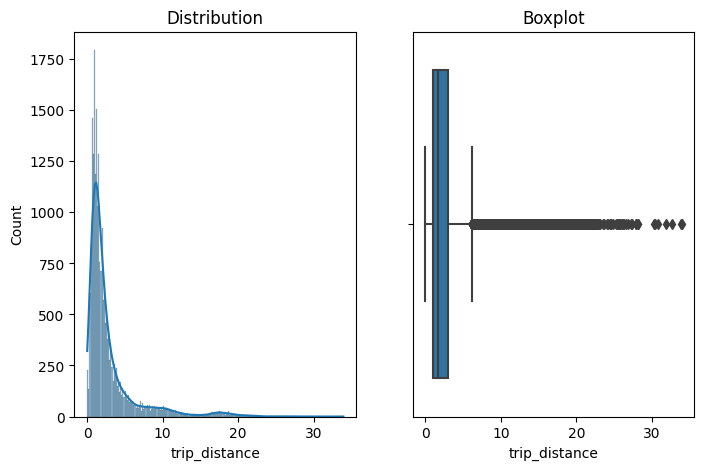

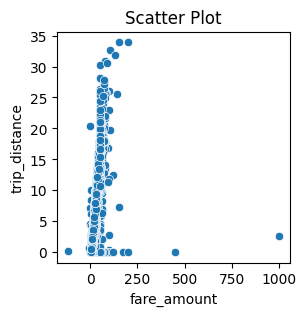

In [ ]:
#getting the distribution and boxplot for Trip_distance

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))

# Plot distribution (histogram)
sns.histplot(df['trip_distance'], kde=True, ax=axes[0])
axes[0].set_title('Distribution')

# Plot boxplot
sns.boxplot(x=df['trip_distance'], ax=axes[1])
axes[1].set_title('Boxplot')

if len(df) >= 3:
    # Plot scatter plot
    plt.figure(figsize=(3, 3))
    sns.scatterplot(x='fare_amount', y='trip_distance', data=df)
    plt.title('Scatter Plot')
    plt.show()
else:
    print("Error: Insufficient data for scatter plot.")

Clean the Fare Amount column

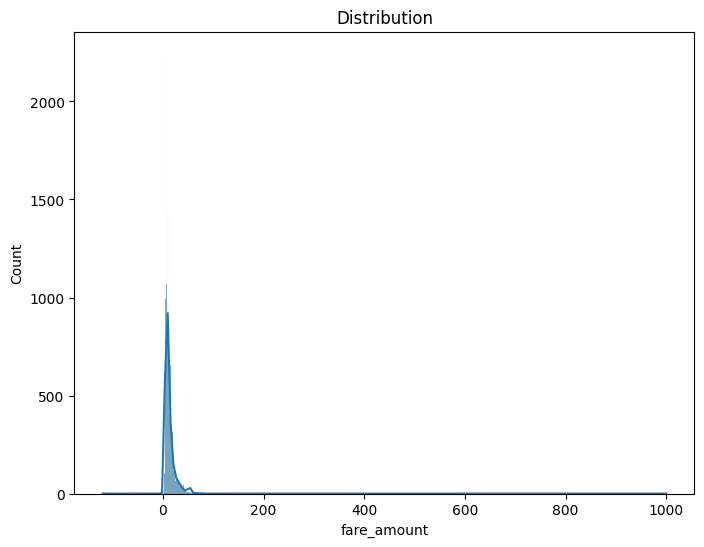

In [ ]:
#it Obvious there outliers in the dataset


# Set up the figure with subplots
fig, axes[0] = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
# Plot distribution (histogram)
sns.histplot(df['fare_amount'], kde=True, ax=axes[0])
axes[0].set_title('Distribution')

# Show the plot
plt.show()


Imputing outliers

All negatives are imputed 0
All numbers above 70 are imputed as 60. $60 is a resonable cost of a fare concidering the distance and location

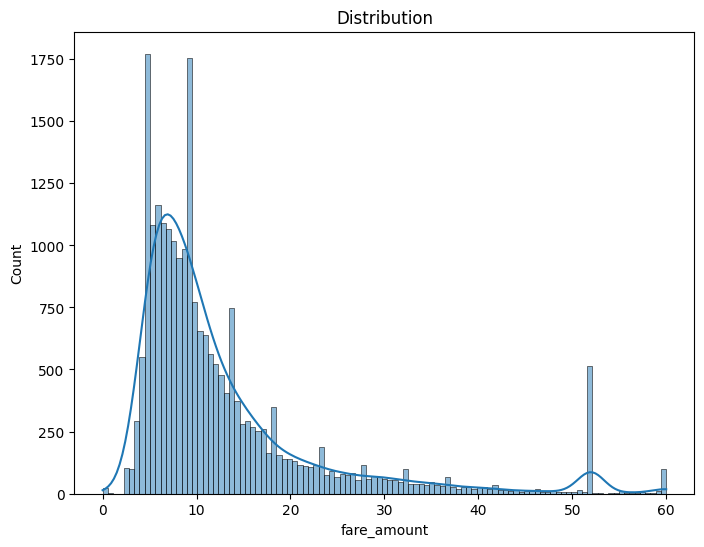

In [ ]:
# Handling outliers in the fare_amount column
df['fare_amount'] = df['fare_amount'].apply(lambda x: max(0, min(60, x)))


# Set up the figure
fig, axes[0] = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
# Plot distribution (histogram)
sns.histplot(df['fare_amount'], kde=True, ax=axes[0])
axes[0].set_title('Distribution')

# Show the plot
plt.show()



In [ ]:
df['fare_amount'].describe()

count    22699.000000
mean        12.888133
std         10.496195
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         60.000000
Name: fare_amount, dtype: float64

EDA

In [ ]:
df

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80
22695,66632549,2,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20
22696,74239933,2,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30
22697,60217333,2,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00


In [ ]:
#dropping columns not needed for EDA
df1 = df.drop(columns=['store_and_fwd_flag','Unnamed: 0','VendorID','passenger_count','RatecodeID','store_and_fwd_flag','mta_tax','improvement_surcharge','morning_rush_hour','evening_rush_hour','hour_of_day'], axis=0)

df1

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,day_of_week,time_of_day
0,2017-03-25 08:55:43,2017-03-25 09:09:47,3.34,100,231,1,13.0,0.0,2.76,0.00,16.56,5,1.0
1,2017-04-11 14:53:28,2017-04-11 15:19:58,1.80,186,43,1,16.0,0.0,4.00,0.00,20.80,1,2.0
2,2017-12-15 07:26:56,2017-12-15 07:34:08,1.00,262,236,1,6.5,0.0,1.45,0.00,8.75,4,1.0
3,2017-05-07 13:17:59,2017-05-07 13:48:14,3.70,188,97,1,20.5,0.0,6.39,0.00,27.69,6,2.0
4,2017-04-15 23:32:20,2017-04-15 23:49:03,4.37,4,112,2,16.5,0.5,0.00,0.00,17.80,5,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2017-02-24 17:37:23,2017-02-24 17:40:39,0.61,48,186,2,4.0,1.0,0.00,0.00,5.80,4,2.0
22695,2017-08-06 16:43:59,2017-08-06 17:24:47,16.71,132,164,1,52.0,0.0,14.64,5.76,73.20,6,2.0
22696,2017-09-04 14:54:14,2017-09-04 14:58:22,0.42,107,234,2,4.5,0.0,0.00,0.00,5.30,0,2.0
22697,2017-07-15 12:56:30,2017-07-15 13:08:26,2.36,68,144,1,10.5,0.0,1.70,0.00,13.00,5,1.0


In [ ]:
#creating year column, month column,weekdays

#Year
df1['Year'] =df1['tpep_pickup_datetime'].dt.strftime('%Y')

df1['Month']= df1['tpep_pickup_datetime'].dt.month_name().str.slice(stop=3)

df1


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,tolls_amount,total_amount,day_of_week,time_of_day,Year,Month
0,2017-03-25 08:55:43,2017-03-25 09:09:47,3.34,100,231,1,13.0,0.0,2.76,0.00,16.56,5,1.0,2017,Mar
1,2017-04-11 14:53:28,2017-04-11 15:19:58,1.80,186,43,1,16.0,0.0,4.00,0.00,20.80,1,2.0,2017,Apr
2,2017-12-15 07:26:56,2017-12-15 07:34:08,1.00,262,236,1,6.5,0.0,1.45,0.00,8.75,4,1.0,2017,Dec
3,2017-05-07 13:17:59,2017-05-07 13:48:14,3.70,188,97,1,20.5,0.0,6.39,0.00,27.69,6,2.0,2017,May
4,2017-04-15 23:32:20,2017-04-15 23:49:03,4.37,4,112,2,16.5,0.5,0.00,0.00,17.80,5,3.0,2017,Apr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,2017-02-24 17:37:23,2017-02-24 17:40:39,0.61,48,186,2,4.0,1.0,0.00,0.00,5.80,4,2.0,2017,Feb
22695,2017-08-06 16:43:59,2017-08-06 17:24:47,16.71,132,164,1,52.0,0.0,14.64,5.76,73.20,6,2.0,2017,Aug
22696,2017-09-04 14:54:14,2017-09-04 14:58:22,0.42,107,234,2,4.5,0.0,0.00,0.00,5.30,0,2.0,2017,Sep
22697,2017-07-15 12:56:30,2017-07-15 13:08:26,2.36,68,144,1,10.5,0.0,1.70,0.00,13.00,5,1.0,2017,Jul


EDA VISUALIZATION

In [ ]:
df1['Year'].value_counts()  #just one year data

2017    22699
Name: Year, dtype: int64

In [ ]:
df1['payment_type'].value_counts()  #just one year data

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64

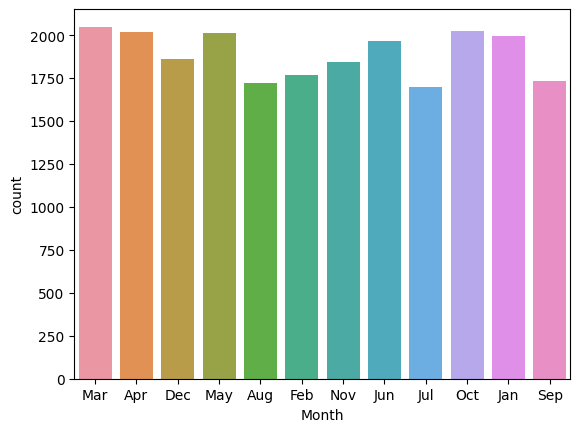

In [ ]:
# Create a count plot
sns.countplot(x='Month', data=df1)

data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
}
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'Month' to a categorical type with the desired order
df1['Month'] = pd.Categorical(df1['Month'], categories=month_order, ordered=True)

# Show the plot
plt.show()

In [ ]:
# Group by 'Month' and calculate the sum of 'total amount' for each month
monthly_totals = df1.groupby('Month')['total_amount'].sum().reset_index()

monthly_totals

,Month,total_amount
0,Jan,31735.25
1,Feb,28937.89
2,Mar,33085.89
3,Apr,32012.54
4,May,33828.58
5,Jun,32920.52
6,Jul,26617.64
7,Aug,27759.56
8,Sep,28206.38
9,Oct,33065.83


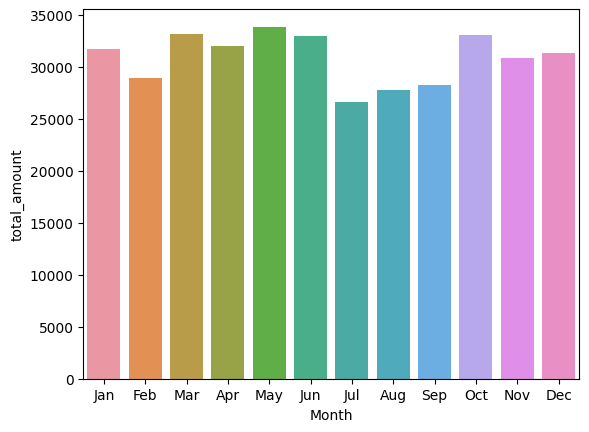

In [ ]:
sns.barplot(x='Month', y='total_amount', data=monthly_totals)

plt.show()

In [ ]:
# Group by 'Month' and calculate the sum of 'total amount' for each month
total_distance_monthly = df1.groupby('Month')['trip_distance'].sum().reset_index()

total_distance_monthly

,Month,trip_distance
0,Jan,5656.20
1,Feb,5009.69
2,Mar,5907.93
3,Apr,5925.07
4,May,6065.43
5,Jun,5846.83
6,Jul,4785.59
7,Aug,5146.53
8,Sep,5100.54
9,Oct,5859.36


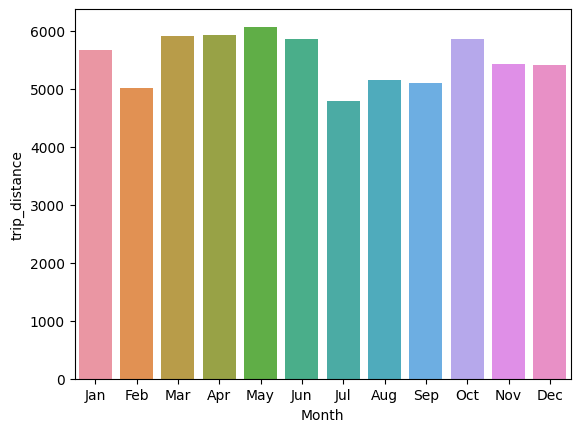

In [ ]:
# Group by 'Month' and calculate the sum of 'trip_distance' for each month
sns.barplot(x='Month', y='trip_distance', data=total_distance_monthly)

plt.show()

<ipython-input-31-740e99ccac75>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


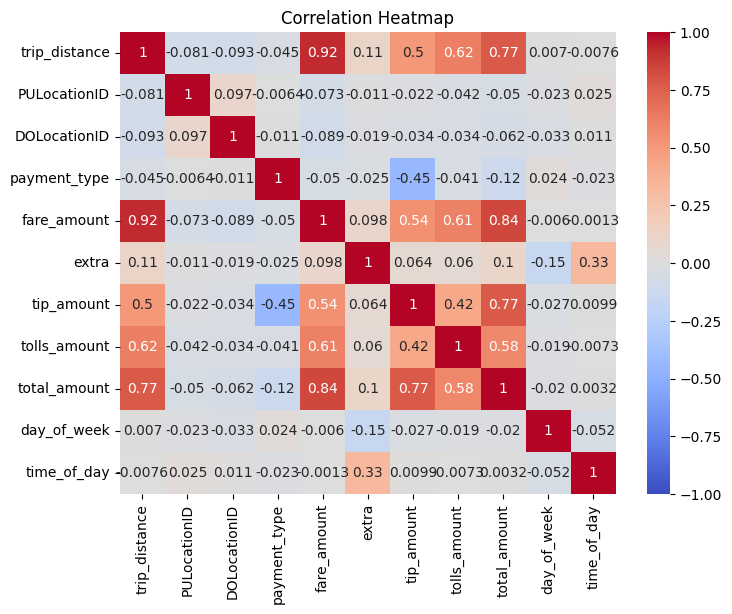

In [ ]:
#getting to know the relation between trip_distance and fare_amount

# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

FEATURE ENGINEERING

Date and time feature

In [ ]:
#converting pickup and dropoff datetime into datetime format

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])



In [ ]:
#creating a column for rush hour
#morning between 7am to 10am
#evenings between 4pm to 8pm

# Create binary features for morning rush hour (7 am to 10 am) and evening rush hour (4 pm to 8 pm)
df['morning_rush_hour'] = ((df['tpep_pickup_datetime'].dt.hour >= 7) & (df['tpep_pickup_datetime'].dt.hour <= 10) &
                            (df['tpep_pickup_datetime'].dt.dayofweek < 5)).astype(int)

df['evening_rush_hour'] = ((df['tpep_pickup_datetime'].dt.hour >= 16) & (df['tpep_pickup_datetime'].dt.hour <= 20) &
                            (df['tpep_pickup_datetime'].dt.dayofweek < 5)).astype(int)

df


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,morning_rush_hour,evening_rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.00,0.3,16.56,0,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.00,0.3,20.80,0,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.00,0.3,8.75,1,0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.00,0.3,27.69,0,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.00,0.3,17.80,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22694,14873857,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,2,4.0,1.0,0.5,0.00,0.00,0.3,5.80,0,1
22695,66632549,2,2017-08-06 16:43:59,2017-08-06 17:24:47,1,16.71,2,N,132,164,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,0,0
22696,74239933,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,2,4.5,0.0,0.5,0.00,0.00,0.3,5.30,0,0
22697,60217333,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,1,10.5,0.0,0.5,1.70,0.00,0.3,13.00,0,0


In [ ]:
#Time of Day Features
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['hour_of_day'] = df['tpep_pickup_datetime'].dt.hour

df['time_of_day'] = pd.cut(df['hour_of_day'], bins=[0, 6, 12, 18, 24], labels=['night', 'morning', 'afternoon', 'evening'])

df.head()


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,morning_rush_hour,evening_rush_hour,day_of_week,hour_of_day,time_of_day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.5,2.76,0.0,0.3,16.56,0,0,5,8,morning
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.5,4.00,0.0,0.3,20.80,0,0,1,14,afternoon
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.5,1.45,0.0,0.3,8.75,1,0,4,7,morning
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.5,6.39,0.0,0.3,27.69,0,0,6,13,afternoon
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.00,0.0,0.3,17.80,0,0,5,23,evening


In [ ]:
# Mapping labels to numeric values
label_mapping = {'morning': 0, 'afternoon': 1, 'evening': 2, 'night': 3}

# Applying the mapping to create the numeric 'time_of_day' column
df['time_of_day'] = pd.cut(df['hour_of_day'], bins=[0, 6, 12, 18, 24], labels=['morning', 'afternoon', 'evening', 'night'])
df['time_of_day'] = df['time_of_day'].map(label_mapping)

#coverting the date type from category to float

df['time_of_day'] = df['time_of_day'].astype('float')



df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,morning_rush_hour,evening_rush_hour,day_of_week,hour_of_day,time_of_day
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.5,2.76,0.0,0.3,16.56,0,0,5,8,1.0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.5,4.00,0.0,0.3,20.80,0,0,1,14,2.0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.5,1.45,0.0,0.3,8.75,1,0,4,7,1.0
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.5,6.39,0.0,0.3,27.69,0,0,6,13,2.0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.5,0.00,0.0,0.3,17.80,0,0,5,23,3.0


DATA PREPROCESSING

In [ ]:
#dropping features that would not be use for the model

df0 = df.drop(columns=['Unnamed: 0','VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','RatecodeID','RatecodeID','payment_type','payment_type','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','store_and_fwd_flag'], axis=0)

df0.head()

,trip_distance,PULocationID,DOLocationID,fare_amount,morning_rush_hour,evening_rush_hour,day_of_week,hour_of_day,time_of_day
0,3.34,100,231,13.0,0,0,5,8,1.0
1,1.80,186,43,16.0,0,0,1,14,2.0
2,1.00,262,236,6.5,1,0,4,7,1.0
3,3.70,188,97,20.5,0,0,6,13,2.0
4,4.37,4,112,16.5,0,0,5,23,3.0


In [ ]:
df0.shape

(22699, 9)

In [ ]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trip_distance      22699 non-null  float64
 1   PULocationID       22699 non-null  int64  
 2   DOLocationID       22699 non-null  int64  
 3   fare_amount        22699 non-null  float64
 4   morning_rush_hour  22699 non-null  int64  
 5   evening_rush_hour  22699 non-null  int64  
 6   day_of_week        22699 non-null  int64  
 7   hour_of_day        22699 non-null  int64  
 8   time_of_day        21962 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 1.6 MB


Slitting the dataframe into Feautres and Target

In [ ]:
X = df0.drop(columns=['fare_amount'], axis=1)

Y = df0['fare_amount']

In [ ]:
print(X.shape)

print(Y.shape)


(22699, 8)
(22699,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)



In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(22699, 8) (18159, 8) (4540, 8)


Model Building and Training

In [ ]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
#Making prediction

y_pred =model.predict(X_test)

Evaluation of model

In [ ]:
mse = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 13.612545858710261


MSE =13.6 seem large. We will compare this model with RandomForest and find the best hyperparameter for optimization

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

XGBoost Hyperparameter Tunning

In [ ]:
param_grid_xgb = {

                 'learning_rate': [0.1, 0.01, 0.001],
                 'n_estimator':[100, 200, 300],
                 'max_depth': [3,5,7],
                 'subsample':[0.8, 0.9, 1.0],
                 'colsample_bytree': [0.8, 0.9, 1.0]
}

In [ ]:
#creating xgb model

xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)


In [ ]:
#Performing grid search with cross-validation

grid_search_xgb =GridSearchCV(xgb_model,param_grid_xgb, cv=5, scoring ='neg_mean_squared_error')

grid_search_xgb.fit(X_train, Y_train)

#Get the best parameters

best_param_xgb= grid_search_xgb.best_params_

print('Best Hyperparameters for XGBoost:', best_param_xgb)

Best Hyperparameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimator': 100, 'subsample': 1.0}

Parameters: { "n_estimator" } are not used.

Implementing Best Hypermeters for XGBoost

In [ ]:
best_xgb_model = XGBRegressor(
    learning_rate= best_param_xgb['learning_rate'],
    max_depth=best_param_xgb['max_depth'],
    subsample=best_param_xgb['subsample'],
    colsample=best_param_xgb['colsample_bytree'],
    random_state=42
)

In [ ]:
best_xgb_model.fit(X_train, Y_train)

xgb_predictions =best_xgb_model.predict(X_test)

mse = mean_squared_error(Y_test, xgb_predictions)

print(f'Mean Squared Error: {mse}')

Mean Squared Error: 12.325877057254331


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [12:49:54] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "colsample" } are not used.

  warnings.warn(smsg, UserWarning)
